In [14]:
## author: Virginia Ordoño Bernier
## date:January 2024

# Árbol de decisión con clasificación
El objetivo es clasificar el csv con datos sintéticos.

### Carga de datos

In [15]:
import pandas as pd

csv = './data/data5.csv'
data = pd.read_csv(csv)
df_data5 = pd.DataFrame(data)
print(df_data5.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  target
0  -2.250270  -1.646135   1.436570   1.148096  -0.223791     2.0
1  -1.785269  -0.565972   1.346475   1.041822  -0.697704     2.0
2   1.589542   0.796631  -1.328454  -1.005298   1.753727     1.0
3   1.832943  -0.284234  -1.907732  -1.272604  -0.718502     0.0
4   1.012438   0.080761  -0.998305  -0.524684  -1.071300     0.0


In [16]:
df_data5['target'] = df_data5['target'].astype(int)
print(df_data5.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  target
0  -2.250270  -1.646135   1.436570   1.148096  -0.223791       2
1  -1.785269  -0.565972   1.346475   1.041822  -0.697704       2
2   1.589542   0.796631  -1.328454  -1.005298   1.753727       1
3   1.832943  -0.284234  -1.907732  -1.272604  -0.718502       0
4   1.012438   0.080761  -0.998305  -0.524684  -1.071300       0


### Análisis exploratorio para visualizar la distribución de las clases

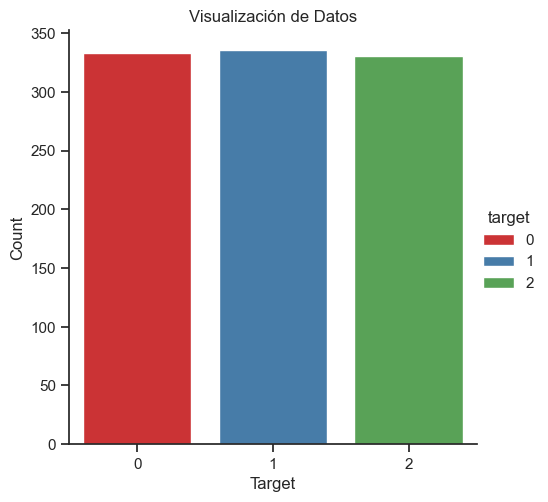

Instancias por clase
target
0    333
1    336
2    331
dtype: int64


In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style='ticks') # line stlye
# kind='count' = amount of ocurrences of each class
sns.catplot(x='target', data=df_data5, kind='count', hue='target', palette='Set1')
plt.title("Visualización de Datos")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()
print('Instancias por clase')
print(df_data5.groupby('target').size())

Conclusión: cantidad equilibrada de etiquetas

### Gráfico de Dispersión

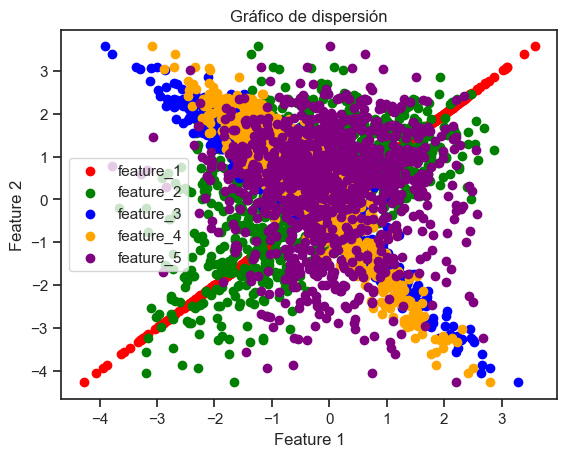

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

colors = ['red', 'green', 'blue', 'orange', 'purple']
for i, column in enumerate(df_data5.columns[:-1]):
    plt.scatter(df_data5[column], df_data5['feature_1'], c=colors[i], label=column)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de dispersión')

plt.legend()
plt.show()


### Preparación de los datos para el entrenamiento

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_data5, test_size=0.2, random_state=42)

# Reset index to maintain an order
train.reset_index(inplace = True)
test.reset_index(inplace = True)

print("Conjunto de entrenamiento:")
print(train.head())

print("\nConjunto de prueba:")
print(test.head())

Conjunto de entrenamiento:
   index  feature_1  feature_2  feature_3  feature_4  feature_5  target
0     29  -0.221856   0.353564   0.188544   0.164531   0.443151       2
1    535   0.925385   2.584422   0.158653   0.266296  -0.236843       1
2    695   0.979832  -1.498700  -1.523039  -1.139853   0.295109       0
3    557   0.015903  -0.188293  -0.169937  -0.342039   0.118100       2
4    836  -2.204873  -1.327249   1.510263   1.239241  -1.050175       2

Conjunto de prueba:
   index  feature_1  feature_2  feature_3  feature_4  feature_5  target
0    521  -0.264802  -0.738554  -0.072787  -0.139147   1.254783       2
1    737   1.566018   1.440003  -1.042015  -0.950533   1.499979       1
2    740   0.508039  -0.322525  -0.655928  -0.168989  -0.462169       0
3    660  -1.687212  -2.485684   0.711596   0.704929  -0.131961       2
4    411   0.624684   1.064968  -0.247751  -0.503806   1.149351       1


### Selección de la variables más correlacionadas con la variable de salida

In [20]:
# Get correlations
correlation_matrix = df_data5.corr()

# Compare with target and sort them
correlation = correlation_matrix['target']
sorted_correlations = correlation.sort_values(ascending=False)

print(sorted_correlations)

target       1.000000
feature_3    0.704496
feature_4    0.682975
feature_5    0.030719
feature_2   -0.043386
feature_1   -0.643008
Name: target, dtype: float64


### Creación y entrenamiento del modelo con las variables con mayor correlación
Usaremos tanto criterio entropía como índice gini

In [21]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train = train[['feature_3', 'feature_4']]
y_train = train['target']
X_test = test[['feature_3', 'feature_4']]
y_test = test['target']

model_entropy = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
model_gini = DecisionTreeClassifier(max_depth = 4, criterion = 'gini')

# Trainig
model_entropy.fit(X_train, y_train)
model_gini.fit(X_train, y_train)

# Prediction
y_pred_entr = model_entropy.predict(X_test)
y_pred_gini = model_gini.predict(X_test)

# Accuracy. Better for classification problems
accuracy = accuracy_score(test['target'], y_pred_entr)
print(f'Precisión Entropía: {round(accuracy, 2)}')
accuracy = accuracy_score(test['target'], y_pred_gini)
print(f'Precisión Índice Gini: {round(accuracy, 2)}')

# Classification Report
print("\nInforme de Clasificación Entropía:")
print(classification_report(test['target'], y_pred_entr))
print("\nInforme de Clasificación Índice de Gini:")
print(classification_report(test['target'], y_pred_gini))

Precisión Entropía: 0.62
Precisión Índice Gini: 0.62

Informe de Clasificación Entropía:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71        67
           1       0.42      0.52      0.47        58
           2       0.82      0.60      0.69        75

    accuracy                           0.62       200
   macro avg       0.64      0.62      0.62       200
weighted avg       0.66      0.62      0.63       200


Informe de Clasificación Índice de Gini:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        67
           1       0.42      0.52      0.46        58
           2       0.82      0.60      0.69        75

    accuracy                           0.62       200
   macro avg       0.64      0.62      0.62       200
weighted avg       0.65      0.62      0.63       200



### Validación cruzada: optimización de parámetros

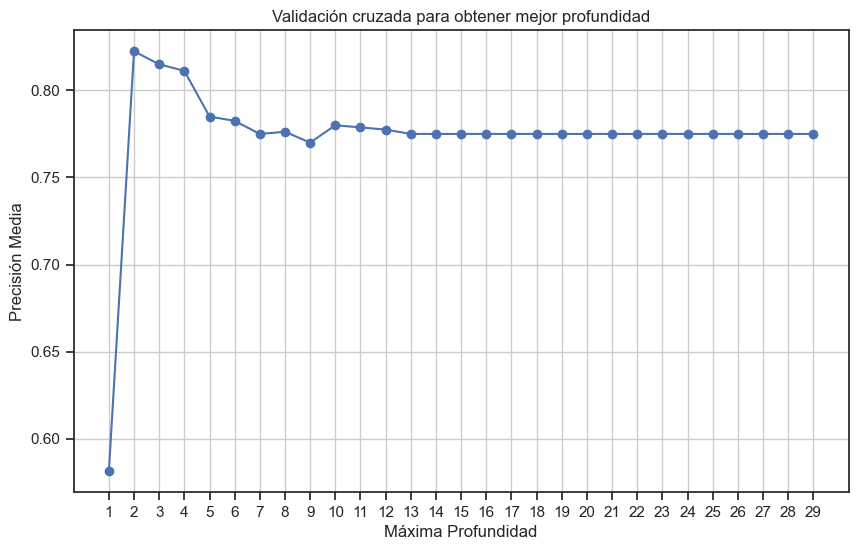

Mejor profundidad: 2
Mayor Precisión Media: 0.8225


In [22]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Supongamos que ya has dividido tus datos en train y test

cv = KFold(n_splits=4)

total_scores = []
best_depth = None
max_accuracy = 0.0

for i in range(1, 30):
    fold_accuracies = []
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)

    # Divide train and test groups
    for train_fold, test_fold in cv.split(train):
        f_train = train.iloc[train_fold] # train_fold index, selects a row. F_train is a new df 
        f_test = train.iloc[test_fold] # test_fold index, selects a row. F_test is a new df

        dt.fit(
            X=f_train.drop(['target'], axis=1),  # thorugh the column
            y=f_train['target']
        )
        X_test = f_test.drop(['target'], axis=1)  # thorugh the column
        y_pred = dt.predict(X_test)

        # Evaluation
        accuracy = accuracy_score(f_test['target'], y_pred)
        fold_accuracies.append(accuracy)
    
    # Calculate and store the average accuracy for the current depth
    avg_accuracy = np.mean(fold_accuracies)
    total_scores.append(avg_accuracy)
    
    # Check if the current depth results in a bigger accuracy
    if avg_accuracy > max_accuracy:
        max_accuracy = avg_accuracy
        best_depth = i

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), total_scores, marker='o', linestyle='-', color='b')
plt.title('Validación cruzada para obtener mejor profundidad')
plt.xlabel('Máxima Profundidad')
plt.ylabel('Precisión Media')
plt.xticks(range(1, 30))
plt.grid(True)
plt.show()

# Print the results
print(f"Mejor profundidad: {best_depth}")
print(f"Mayor Precisión Media: {max_accuracy}")


### Creación del modelo con los mejores hiperparámetros 

In [23]:
from sklearn.metrics import classification_report
X_train = train[['feature_3', 'feature_4']]
y_train = train['target']
X_test = test[['feature_3', 'feature_4']]
y_test = test['target']

model = DecisionTreeClassifier(max_depth = 2)
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

print("\nInforme de Clasificación Índice de Gini:")
print(classification_report(y_test, y_pred)) 


Informe de Clasificación Índice de Gini:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69        67
           1       0.42      0.57      0.48        58
           2       0.82      0.60      0.69        75

    accuracy                           0.62       200
   macro avg       0.64      0.62      0.62       200
weighted avg       0.66      0.62      0.63       200



### Visualizacion del árbol de decisión

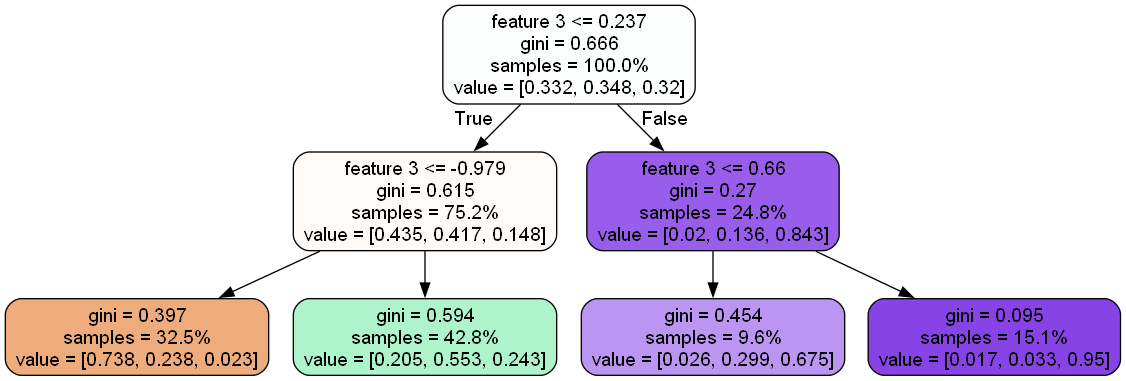

In [24]:
import pydot
from IPython.display import Image

from io import StringIO

from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(model, out_file = dot_data, proportion = True, feature_names = ["feature 3", "feature 4"], rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

### Importancia de las variables
La importancia de las variables se deriva del propio modelo, y se calcula observando cómo cada característica contribuye a reducir la impureza (o aumentar la pureza) de los nodos en el árbol de decisión durante el proceso de entrenamiento.

In [25]:
# Gini criterio by default
classifier = tree.DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Get importance
importances = classifier.feature_importances_

# Create dataframe
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Exclude column 'index' if exists
if 'index' in feature_importance_df['Feature'].values:
    feature_importance_df = feature_importance_df[feature_importance_df['Feature'] != 'index']

# Order by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Informe de Importancia de las Variables:")
print(feature_importance_df)



Informe de Importancia de las Variables:
     Feature  Importance
0  feature_3    0.642997
1  feature_4    0.357003
